**Primera Entrega
Data Science II**

**Ferino Guillermo**
**DNI 32.565.927**
**Comisión 75690#



**Conjunto de Datos Seleccionado:**
Información del conjunto de datos:
Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requirió más de un contacto con el mismo cliente, para acceder si el producto (depósito a plazo bancario) sería ('sí') o no ('no') suscrito.


**Objetivos SMART:**
-Específico: Identificar patrones entre nivel educativo, saldo y aceptación de la oferta.
-Medible: Analizar la correlaciones, limpiezas y visualizaciones entre estas variables para validar la hipótesis.
-Alcanzable: Utilizar Python para generar gráficos y análisis estadísticos.
-Relevante: Este análisis puede ayudar a dirigir futuras campañas a los perfiles más receptivos.
-Temporal: Completar el análisis en el marco del trabajo actual.

**Hipótesis propuesta:**
“Predecir si un cliente va a aceptar o no el producto ofrecido”.



##Ejemplo de cómo se obtendrían los datos desde una API pública:
Previamente consultado con el docente que mi trabajo era sobre un dataset CSV, Me indicó que debía incluir los comandos de cómo citar una API (Comando con los cuales sitaria la misma).

*Importamos y convocamos  las librerías necesarias:*
-import requests
-import pandas as pd

Nos conectaríamos a la API pública que contiene los datos que vamos a trabajar
REST:

url = "https://api.ejemplo.gov/banco/marketing"
params = {"formato": "csv"}

Este bloque sería el que descarga los datos desde la API:
response = requests.get(url, params=params)

with open("datos_marketing.csv", "wb") as f:
f.write(response.content)


In [84]:
##Comienzo cargando las librerias:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [85]:
#Subo el archivo que esta en mi drive con la ruta.

from google.colab import drive
import os

drive.mount('/content/drive')

# Ruta exacta del archivo
ruta = "/content/drive/MyDrive/TP Coder House/DatScience2/BancosFinal.csv"

#Verificar y cargar
if os.path.exists(ruta):
    df = pd.read_csv(ruta, delimiter=";", encoding="utf-8")
    print("✅ Archivo BancosFinal.csv cargado correctamente")
else:
    from google.colab import files
    print("⚠️ No se encontró el archivo en Drive. Subilo manualmente.")
    uploaded = files.upload()
    df = pd.read_csv(list(uploaded.keys())[0], delimiter=";", encoding="utf-8")

# Verificar que se cargó
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Archivo BancosFinal.csv cargado correctamente


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,acepta
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
#Visualizo la tablas para ver la composicion del archivo de trabajo y poder ver las distintas variables. Comienzo con el EDA

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,acepta
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no



En el archivo :
https://docs.google.com/document/d/1E6oKNozwEs8dusoKGV8EeSX33OGyda5QayfIWz-CXn4/edit?tab=t.0#heading=h.wl9ok8v63kof
Dejo:

Nombre de la variable,Role,Tipo,Demográfico,Descripción,Unidades,Valores ,faltantes.

Resumen de Metadata:

- **Filas:** ~45.000  
- **Columnas:** 17  
- **Variables clave:** `education`, `balance`, `y respuesta`.


In [88]:
#Reviso el Dataframe.

type(df)

pandas.core.frame.DataFrame

In [89]:
#Reviso la informacion y los tipos de datos del archivo.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  acepta     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [90]:
#Reviso si #NA- El archivo menciona que no , pero hago la buena practica.

df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [91]:
#Reviso cantidad de Filas y Columnas

df.shape

(45211, 17)

In [92]:
#Cuento los #Na y lo divod por la cantida para ver el peso % de los faltantes. En este caso como mencione antes no hay.

(df.isna().sum()/df.shape[0])*100

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
balance,0.0
housing,0.0
loan,0.0
contact,0.0
day,0.0


In [93]:
#Reviso si hay Nulls .
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,acepta
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [94]:
#Analizo las distintas estadísticas descriptivas y sus valores. Ejemplo Max y Min.

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [95]:
#Giro la ubicacion y Analizo las distintas estadísticas descriptivas y sus valores. Ejemplo Max y Min.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [96]:
#Reviso como esta el nombre de las columnas , para no comer error a la hora de "llamar".

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'acepta'],
      dtype='object')

In [97]:
#Reviso la Col Education para ver datos.

df[ 'education']

,education
0,tertiary
1,secondary
2,secondary
3,unknown
4,unknown
...,...
45206,tertiary
45207,primary
45208,secondary
45209,secondary


In [98]:
#llamo a educacion y hago un count para ver cantidades por categoria totales. La llame abcd , le cambie el nombre..pero cuando lo cambio me da distinto.

abcd= df['education'].value_counts()

In [99]:
#Llamo a la cuenta para ver la cantidad de cada categoria.abcd.

abcd

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


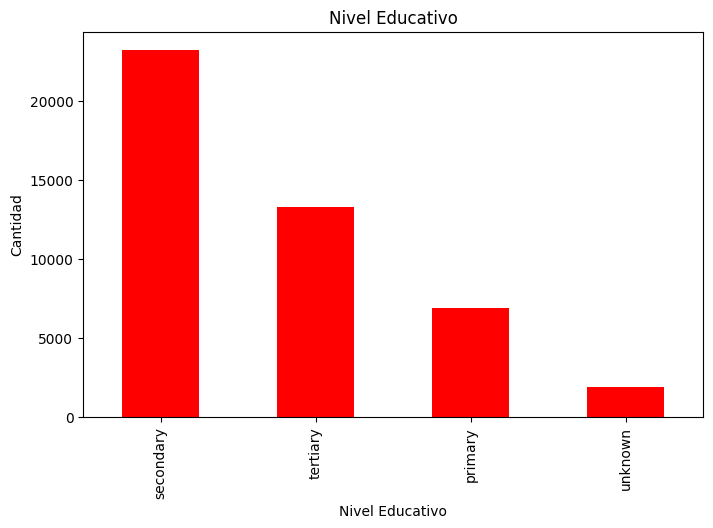

In [100]:
   #Hago grafico con tabla anteriro de barras para ver nievel eductivo x cantidad de usuarios.

plt.figure(figsize=(8,5))
abcd.plot(kind='bar',color="Red")
plt.title('Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Cantidad')
plt.show()

Detalle Grafico :Nivel Educativo por cantidad de Clientes.  Podemos ver que el mayor grupo de Clientes esta en el nivel educativo de Secondary 23.202, seguido por Tertiary 13.301 , Primary 6851 y unknown 1857.

In [101]:
#Hago un re count de Acepta ,donde esta el (si / no) para ver si aceptaron credito y  cuanto hay por categoria . (mismo que el anteriror le pongo abcd por que sino falla).

abcd= df['acepta'].value_counts()

In [102]:
#Llamo a la cuenta para ver la cantidad de cada categoria.Yes / No que aceptaron credito.

abcd

,count
acepta,
no,39922
yes,5289


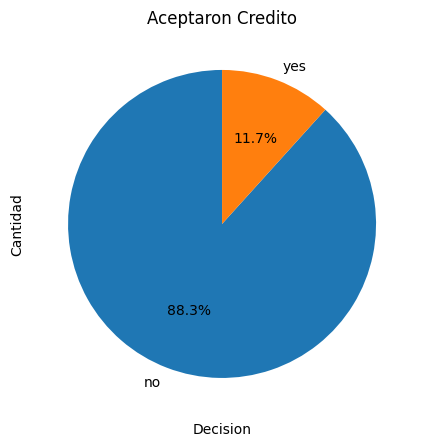

In [103]:
#Hago grafico con tabla anteriro de barras para ver Si / NO x cantidad de usuarios aceptaron credito.

plt.figure(figsize=(8,5))
abcd.plot.pie(autopct="%1.1f%%", startangle=90)
plt.title('Aceptaron Credito')
plt.xlabel('Decision')
plt.ylabel('Cantidad')
plt.show()

Detalle Grafico :Aceptaron el credito por cantidad de Clientes. Podemos ver que que Aceptraron (yes)5289 y No Aceptaron (No) 39922.

In [104]:
#Reviso si en la Col Acepta hay algo mas que si o no (yes/No).

print(df['acepta'].unique())

['no' 'yes']


In [105]:
#Llamo a la col Acepta y normalizo yes = 1 y No = o para llamarla acepta_binary .

df['acepta_binary'] = df['acepta'].map({'yes': 1, 'no': 0})

In [106]:
#Reviso acepta_binary
print(df['acepta_binary'].unique())

[0 1]


In [107]:
#Creo una tabla agrupando By educaction y si acepto_binary los cuento y  para llamarla educacion_aceepta_table y resetep el indice .

education_acceptance_table = df[df['acepta_binary'] == 1].groupby('education')['acepta_binary'].count().reset_index()

In [108]:
#Reviso la tabla y sus col.

education_acceptance_table.columns = ['education', 'total_count']

In [109]:
#Reviso la tabla y sus categorias y sus sumas tolates x nivel educativo.

print(education_acceptance_table)

   education  total_count
0    primary          591
1  secondary         2450
2   tertiary         1996
3    unknown          252


In [110]:
#Creo un data.frame de education que aceptaron el credito y sus cantidades x nivel educativo  y u datafram de education por nivel educativo y sus cantidades totales.
#Hago un merged table = para unir ambas dos y poder ver el nivel educativo de los clientes total , la cantidad que de estos aceptaron y luego el promedio de esto.

education_acceptance_table = pd.DataFrame({'education': ['primary', 'secondary', 'tertiary', 'unknown'],'accept_count': [591, 2450, 1996, 252]})

education_total_table = pd.DataFrame({'education': ['primary', 'secondary', 'tertiary', 'unknown'],'total_count': [6851, 23202, 13301, 1857]})

merged_table = pd.merge(education_acceptance_table, education_total_table, on='education')

merged_table['acceptance_rate'] = (merged_table['accept_count'] / merged_table['total_count']) * 100




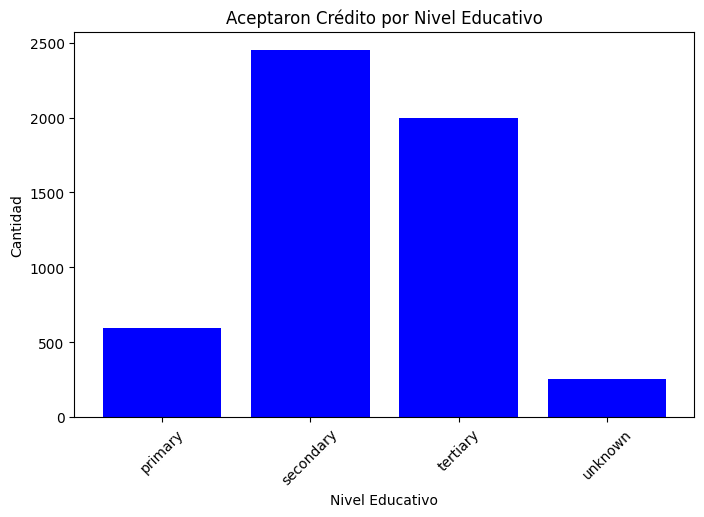

In [111]:
#Grafico donde puedo ver x nivel educativo la cantidad de personas que acceptaron el credito y luego sumando la tabla anterior puede ver cantidades totales, que aceparon y % de aceptaron.

plt.figure(figsize=(8, 5))
plt.bar(education_acceptance_table['education'], education_acceptance_table['accept_count'], color="blue")
plt.title('Aceptaron Crédito por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

Detalle Grafico:  Aceptaron Credito por Nivel Educativo
La aceptación por nivel educativo de los clientes a prestamos: Se observa cómo la aceptación varía según el nivel educativo.
Donde  secondary tiene una aceptacion 2.450 de 23.202. texto en negrita

In [112]:
#Vuelvo a ver el nombre de cada col para ver como quedo despues de sumar el de acepta_binary.
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'acepta', 'acepta_binary'],
      dtype='object')

In [113]:
#Analazio la columna Balance en su cuenta de Euros.
df[ 'balance']

,balance
0,2143
1,29
2,2
3,1506
4,1
...,...
45206,825
45207,1729
45208,5715
45209,668


In [114]:
#Agrupo la educacion con el balance del total de los usuarios por nivel educativo y reseteo el indice .

balance_by_education = df.groupby('education')['balance'].sum().reset_index()

In [115]:
#Llamo a suma educacion y total blance.

balance_by_education.columns = ['education', 'total_balance']

In [116]:
#Visualizo la tabla.

print(balance_by_education)

   education  total_balance
0    primary        8570258
1  secondary       26795544
2   tertiary       23388697
3    unknown        2835183


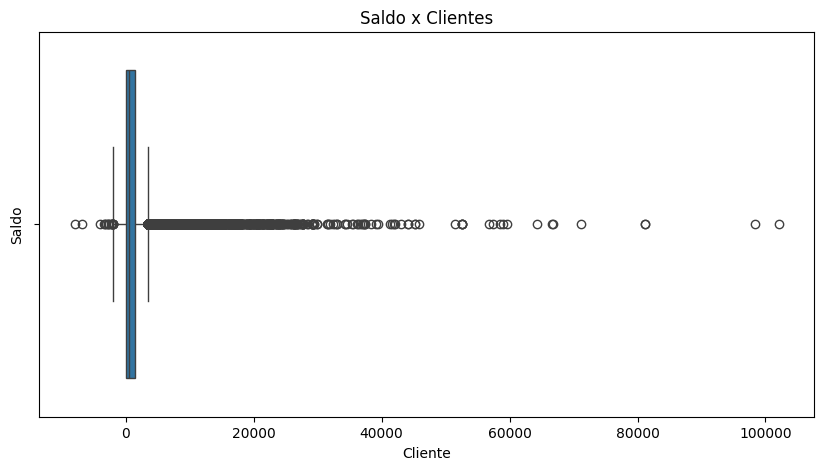

In [117]:
#Realizo grafico de balance de manera Horizontal para ver inferencias.

plt.figure(figsize=(10,5))
sns.boxplot(df['balance'],orient="h")
plt.title('Saldo x Clientes')
plt.xlabel('Cliente')
plt.ylabel('Saldo')
plt.show()

Detalle del Grafico: En el Grafico Saldos por Cliente podemos observar que muchos clientes tiene 0 euros  como saldo en sus cuentas y hay una cantidad que tiene mas 100.000 euros en su cuenta.
En la caja (es pequeña) podemos ver la mediana que indica que se encuentran en 0.

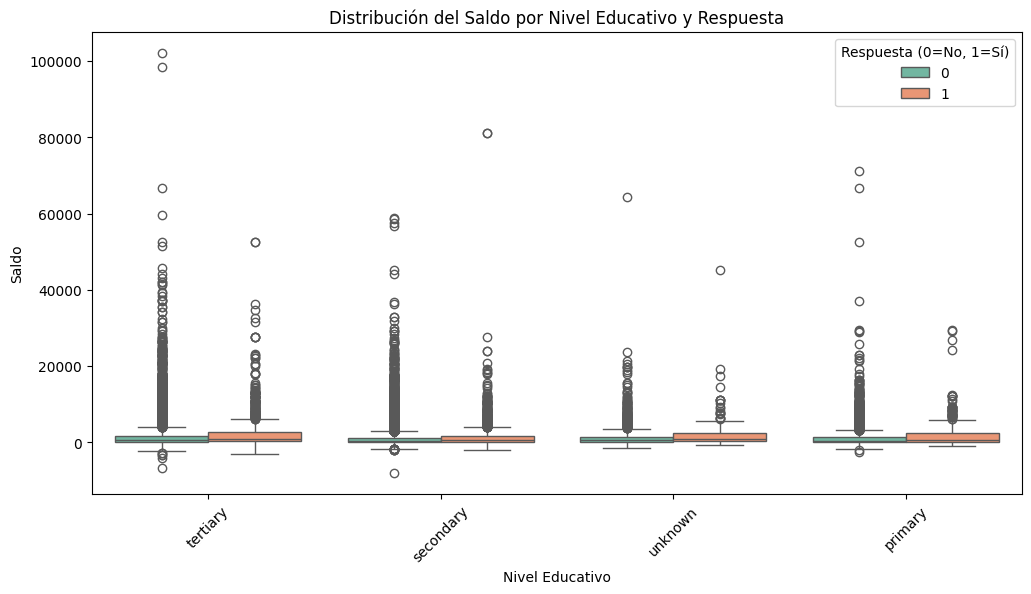

In [118]:
#Realizo grafico para comparar saldo con nivel educactivo y si acepto credito.

plt.figure(figsize=(12, 6))
sns.boxplot(x='education', y='balance',hue='acepta_binary', data=df, palette='Set2')
plt.title('Distribución del Saldo por Nivel Educativo y Respuesta')
plt.xlabel('Nivel Educativo')
plt.ylabel('Saldo')
plt.legend(title='Respuesta (0=No, 1=Sí)', loc='upper right')
plt.xticks(rotation=45)
plt.show()

Detalle del Grafico : Distribucion del Saldo por Nivel Educativo y Respuesta Si acepto o no el credito. Podemos ver como en el Tertiary encontramos a clientes con alto poder financiero y estos no aceptaron el credito.

In [119]:
#Vuelvo a ver el nombre de cada col para ver como quedo despues de sumar el de acepta_binary.
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'acepta', 'acepta_binary'],
      dtype='object')

In [120]:
 #Realizo un filtro para quedarme solo de Educacion con la variable Secondary.

secondary_df = df[df['education'] == 'secondary']

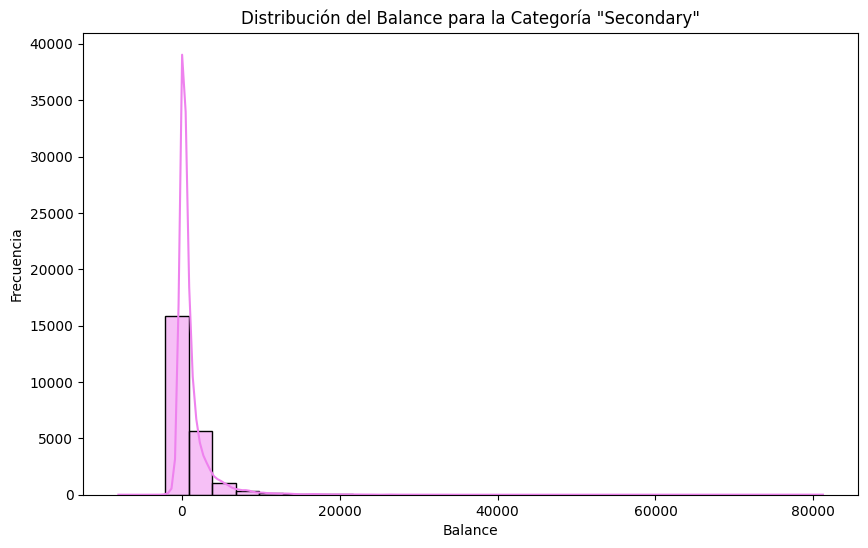

In [121]:
#Realizo histeriograma para ver solo de la categoria Secondary su distribucion de saldos.
plt.figure(figsize=(10, 6))
sns.histplot(secondary_df['balance'], bins=30, kde=True, color='violet')
plt.title('Distribución del Balance para la Categoría "Secondary"')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.show()

Detalle del Grafico: Se observa que la mayoria de los cliente de la categoria Secondary tinen Saldo en 0 euros.
Por otro lado  hay un peño grupo de clientes con balances por encima de 40,000 e incluso llegando a 80,000.

In [122]:
#Realizo un filtro para quedarme solo de Educacion con la variable Tertiary.

tertiary_df = df[df['education'] == 'tertiary']

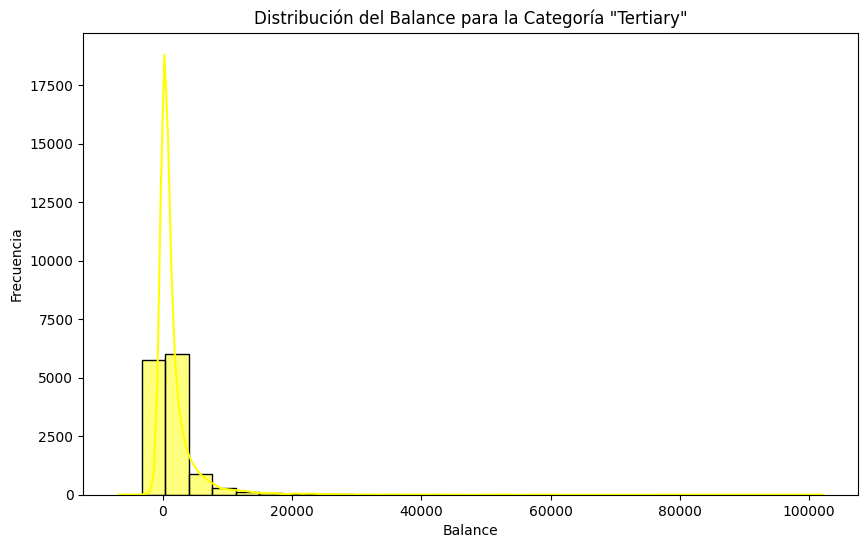

In [123]:
#Realizo histeriograma para ver solo de la categoria Tertiary su distribucion de saldos.

plt.figure(figsize=(10, 6))
sns.histplot(tertiary_df['balance'], bins=30, kde=True, color='yellow')
plt.title('Distribución del Balance para la Categoría "Tertiary"')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.show()

Detalle del Grafico: Se observa que la mayoria de los cliente de la categoria Tertiary  tinen Saldo en 0 euros. Por otro lado hay un peño grupo de clientes con balances por encima de 60,000 e incluso llegando a 100.000

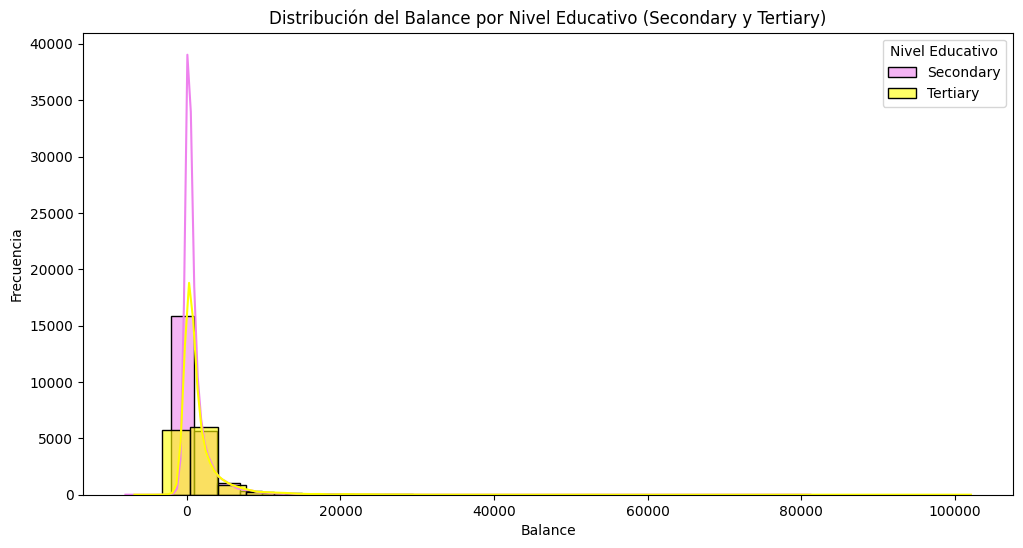

In [124]:
#Armado de los dos graficos separados juntos para poder ver diferencias.

plt.figure(figsize=(12, 6))


sns.histplot(secondary_df['balance'], bins=30, kde=True, color='violet', label='Secondary', alpha=0.6)


sns.histplot(tertiary_df['balance'], bins=30, kde=True, color='yellow', label='Tertiary', alpha=0.6)


plt.title('Distribución del Balance por Nivel Educativo (Secondary y Tertiary)')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.legend(title='Nivel Educativo')
plt.show()

Detalle de Grafico: Grafico compartaivo para ver la diferencias entre Secondary y Terciary que son los dos niveles maximo de educacion de la base.

In [125]:
df #llamo a toda la base luego de EDA

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,acepta,acepta_binary
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


In [126]:
to_drop =["day","month","duration","pdays"]  #Elimino las filas de fechas (dia , mes , duracion, pdays)

In [127]:
df =df.drop(columns=to_drop) ###ya utilizado entonces entiendo que no las encuentra por eso el error

In [128]:
df.head(1) #Reviso como quedo luego del Drop.

,age,job,marital,education,default,balance,housing,loan,contact,campaign,previous,poutcome,acepta,acepta_binary
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,0,unknown,no,0


In [129]:
#Vuelvo a ver el nombre de cada col para ver como quedo despues de borrar.

In [130]:
df.describe().T #analizo.

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
acepta_binary,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


In [131]:
df.info() #Vuelvo a ver la info para ver los Dtypes - y comenzar a ver los object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45211 non-null  int64 
 1   job            45211 non-null  object
 2   marital        45211 non-null  object
 3   education      45211 non-null  object
 4   default        45211 non-null  object
 5   balance        45211 non-null  int64 
 6   housing        45211 non-null  object
 7   loan           45211 non-null  object
 8   contact        45211 non-null  object
 9   campaign       45211 non-null  int64 
 10  previous       45211 non-null  int64 
 11  poutcome       45211 non-null  object
 12  acepta         45211 non-null  object
 13  acepta_binary  45211 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [132]:
df.job.unique()  #Reviso unicos por columna para luego convertir .

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [133]:
df.marital.unique()  #Reviso unicos por columna para luego convertir.

array(['married', 'single', 'divorced'], dtype=object)

In [134]:
df. education .unique()  #Reviso unicos por columna para luego convertir .

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [135]:
df. default  .unique()  #Reviso unicos por columna para luego convertir .

array(['no', 'yes'], dtype=object)

In [136]:
df.  housing .unique()  #Reviso unicos por columna para luego convertir.

array(['yes', 'no'], dtype=object)

In [137]:
#Llamo a la col housin y normalizo yes = 1 y No = o para llamarla acepta_binary .

df['housing_binary'] = df['housing'].map({'yes': 1, 'no': 0})

In [138]:
print(df['housing_binary'].unique()) #Reviso

[1 0]


In [139]:
df. loan .unique()  #Reviso unicos por columna para luego convertir.

array(['no', 'yes'], dtype=object)

In [140]:
#Llamo a la col loan y normalizo yes = 1 y No = o para llamarla acepta_binary .

df['loan_binary'] = df['loan'].map({'yes': 1, 'no': 0})

In [141]:
print(df['loan_binary'].unique()) #Reviso

[0 1]


In [142]:
df. contact .unique()  #Reviso unicos por columna para luego convertir.

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [143]:
df. poutcome.unique()  #Reviso unicos por columna para luego convertir.

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [144]:
df.shape #Reviso cantidad de datos luego de borrar/Drop)

(45211, 16)

In [145]:
to_dropDF =['default_binary'] #Elimino default_binary que cree x erro!

In [146]:
X = df.drop('acepta_binary', axis=1) #divido en X y Y  por Acepta:Binary que es Si (1) , No (0)
y = df['acepta_binary']

In [147]:
y.value_counts(normalize=1)*100 #Reviso el Balance de Aceptacion Total - Claramente esta DESVALANCIADO !!

,proportion
acepta_binary,
0,88.30152
1,11.69848


In [148]:
from sklearn.model_selection import train_test_split  #importo Libreria

In [149]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=42 ,stratify=y)

In [150]:
X_train  #Veo cuanto cae en este grupo

,age,job,marital,education,default,balance,housing,loan,contact,campaign,previous,poutcome,acepta,housing_binary,loan_binary
13382,31,services,married,secondary,no,1,yes,no,cellular,1,0,unknown,no,1,0
32641,35,services,married,secondary,no,195,yes,no,cellular,1,0,unknown,no,1,0
3991,24,blue-collar,single,secondary,no,77,yes,no,unknown,2,0,unknown,no,1,0
8068,35,blue-collar,married,secondary,no,80,yes,yes,unknown,2,0,unknown,no,1,1
27484,37,services,single,secondary,no,105,no,yes,cellular,2,4,failure,no,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16952,45,blue-collar,married,secondary,no,79,yes,no,cellular,1,0,unknown,no,1,0
6317,30,blue-collar,married,secondary,no,1196,no,no,unknown,1,0,unknown,no,0,0
34781,27,management,single,tertiary,no,2559,yes,no,cellular,1,0,unknown,no,1,0
13679,32,housemaid,married,primary,no,0,yes,no,cellular,1,0,unknown,no,1,0


In [151]:
X_test #Veo cuanto cae en este grupo

,age,job,marital,education,default,balance,housing,loan,contact,campaign,previous,poutcome,acepta,housing_binary,loan_binary
37735,40,blue-collar,divorced,secondary,no,973,no,no,cellular,1,0,unknown,yes,0,0
44332,35,unemployed,single,tertiary,no,154,no,no,cellular,4,2,failure,yes,0,0
4432,38,self-employed,married,secondary,no,736,yes,no,unknown,1,0,unknown,no,1,0
38725,35,blue-collar,married,secondary,no,205,yes,yes,cellular,7,1,failure,yes,1,1
38581,44,services,single,secondary,no,532,yes,no,cellular,2,2,failure,no,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,40,services,married,secondary,no,939,yes,no,cellular,3,0,unknown,no,1,0
20622,38,management,married,tertiary,no,1223,no,no,cellular,5,0,unknown,yes,0,0
41684,50,blue-collar,married,primary,no,383,no,no,telephone,2,0,unknown,no,0,0
32749,38,technician,single,tertiary,no,2273,yes,no,cellular,1,0,unknown,no,1,0


In [152]:
from sklearn.preprocessing import OneHotEncoder #llamo y traigo codificador

In [153]:
ohe = OneHotEncoder(sparse_output=False).fit(X_train[["job","marital","education","contact","poutcome","default"]]) #Marcos las varibales que son mas que binerias (True /False)

In [154]:
encoded = ohe.transform(X_train[["job","marital","education","contact","poutcome","default"]]) #Codifico 0 ,1  donde se encuentra la opcion .

In [155]:
encoded #Reviso en codigo

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [156]:
encoded_df =pd.DataFrame (columns =ohe.get_feature_names_out(),data=encoded, index=X_train.index) #Reviso indexacion y controlo que estoy usando X-train .

In [157]:
encoded_df #Reviso en codigo

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_no,default_yes
13382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3991,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8068,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
27484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6317,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
34781,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
13679,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [158]:
X_train = pd.concat([X_train,encoded_df],axis="columns") #Concateno

In [159]:
X_train #Visualizo

,age,job,marital,education,default,balance,housing,loan,contact,campaign,...,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_no,default_yes
13382,31,services,married,secondary,no,1,yes,no,cellular,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32641,35,services,married,secondary,no,195,yes,no,cellular,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3991,24,blue-collar,single,secondary,no,77,yes,no,unknown,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8068,35,blue-collar,married,secondary,no,80,yes,yes,unknown,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
27484,37,services,single,secondary,no,105,no,yes,cellular,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16952,45,blue-collar,married,secondary,no,79,yes,no,cellular,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6317,30,blue-collar,married,secondary,no,1196,no,no,unknown,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
34781,27,management,single,tertiary,no,2559,yes,no,cellular,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
13679,32,housemaid,married,primary,no,0,yes,no,cellular,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [160]:
encoded_test = ohe.transform(X_test[["job","marital","education","contact","poutcome","default"]]) #Codifico 0 ,1  donde se encuentra la opcion .

In [161]:
encoded_df_test =pd.DataFrame (columns =ohe.get_feature_names_out(),data=encoded_test, index=X_test.index) #Reviso indexacion y controlo que estoy usando X-test

In [162]:
X_test = pd.concat([X_test,encoded_df_test],axis="columns") #Concateno

In [163]:
X_test

,age,job,marital,education,default,balance,housing,loan,contact,campaign,...,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_no,default_yes
37735,40,blue-collar,divorced,secondary,no,973,no,no,cellular,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
44332,35,unemployed,single,tertiary,no,154,no,no,cellular,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4432,38,self-employed,married,secondary,no,736,yes,no,unknown,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
38725,35,blue-collar,married,secondary,no,205,yes,yes,cellular,7,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
38581,44,services,single,secondary,no,532,yes,no,cellular,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,40,services,married,secondary,no,939,yes,no,cellular,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
20622,38,management,married,tertiary,no,1223,no,no,cellular,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
41684,50,blue-collar,married,primary,no,383,no,no,telephone,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32749,38,technician,single,tertiary,no,2273,yes,no,cellular,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [164]:
X_train.info() #Reviso los Objetos -

<class 'pandas.core.frame.DataFrame'>
Index: 31647 entries, 13382 to 3184
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  31647 non-null  int64  
 1   job                  31647 non-null  object 
 2   marital              31647 non-null  object 
 3   education            31647 non-null  object 
 4   default              31647 non-null  object 
 5   balance              31647 non-null  int64  
 6   housing              31647 non-null  object 
 7   loan                 31647 non-null  object 
 8   contact              31647 non-null  object 
 9   campaign             31647 non-null  int64  
 10  previous             31647 non-null  int64  
 11  poutcome             31647 non-null  object 
 12  acepta               31647 non-null  object 
 13  housing_binary       31647 non-null  int64  
 14  loan_binary          31647 non-null  int64  
 15  job_admin.           31647 non-null  f

In [165]:
X_train =X_train.drop(["job","marital","education","contact","poutcome","acepta","housing","loan","default"],axis=1) #Borro X TRAIN

In [166]:
X_train #Visualizo

,age,balance,campaign,previous,housing_binary,loan_binary,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_no,default_yes
13382,31,1,1,0,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32641,35,195,1,0,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3991,24,77,2,0,1,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8068,35,80,2,0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
27484,37,105,2,4,0,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16952,45,79,1,0,1,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6317,30,1196,1,0,0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
34781,27,2559,1,0,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
13679,32,0,1,0,1,0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [167]:
X_train.info() #Reviso los Objetos - leugo de borrar obejtos

<class 'pandas.core.frame.DataFrame'>
Index: 31647 entries, 13382 to 3184
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  31647 non-null  int64  
 1   balance              31647 non-null  int64  
 2   campaign             31647 non-null  int64  
 3   previous             31647 non-null  int64  
 4   housing_binary       31647 non-null  int64  
 5   loan_binary          31647 non-null  int64  
 6   job_admin.           31647 non-null  float64
 7   job_blue-collar      31647 non-null  float64
 8   job_entrepreneur     31647 non-null  float64
 9   job_housemaid        31647 non-null  float64
 10  job_management       31647 non-null  float64
 11  job_retired          31647 non-null  float64
 12  job_self-employed    31647 non-null  float64
 13  job_services         31647 non-null  float64
 14  job_student          31647 non-null  float64
 15  job_technician       31647 non-null  f

In [168]:
X_test =X_test.drop(["job","marital","education","contact","poutcome","acepta","housing","loan","default"  ],axis=1) #Borro X TEST

In [169]:
X_test #Visualizo

,age,balance,campaign,previous,housing_binary,loan_binary,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_no,default_yes
37735,40,973,1,0,0,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
44332,35,154,4,2,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4432,38,736,1,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
38725,35,205,7,1,1,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
38581,44,532,2,2,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,40,939,3,0,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
20622,38,1223,5,0,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
41684,50,383,2,0,0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32749,38,2273,1,0,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [170]:
X_test.info() #Reviso los Objetos -

<class 'pandas.core.frame.DataFrame'>
Index: 13564 entries, 37735 to 37155
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  13564 non-null  int64  
 1   balance              13564 non-null  int64  
 2   campaign             13564 non-null  int64  
 3   previous             13564 non-null  int64  
 4   housing_binary       13564 non-null  int64  
 5   loan_binary          13564 non-null  int64  
 6   job_admin.           13564 non-null  float64
 7   job_blue-collar      13564 non-null  float64
 8   job_entrepreneur     13564 non-null  float64
 9   job_housemaid        13564 non-null  float64
 10  job_management       13564 non-null  float64
 11  job_retired          13564 non-null  float64
 12  job_self-employed    13564 non-null  float64
 13  job_services         13564 non-null  float64
 14  job_student          13564 non-null  float64
 15  job_technician       13564 non-null  

In [171]:
X_test.corr() #Visualizo Tabla de correlacion.

,age,balance,campaign,previous,housing_binary,loan_binary,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_no,default_yes
age,1.000000,0.112273,-0.004072,0.010698,-0.179810,-0.002291,-0.051309,-0.043059,0.016468,0.084498,...,0.066926,-0.066822,0.165718,-0.019381,-0.001031,-0.016629,0.051409,-0.014732,0.016660,-0.016660
balance,0.112273,1.000000,-0.014904,0.015192,-0.069441,-0.080752,-0.034763,-0.058557,-0.002580,0.005843,...,0.000760,0.023524,0.030074,-0.041117,0.012744,0.008756,0.031498,-0.029393,0.068593,-0.068593
campaign,-0.004072,-0.014904,1.000000,-0.038572,-0.035089,0.013719,-0.014533,0.008522,0.005611,0.000890,...,0.008838,-0.025926,0.061331,-0.005912,-0.087206,-0.023452,-0.055042,0.108150,-0.014743,0.014743
previous,0.010698,0.015192,-0.038572,1.000000,0.047601,0.000375,0.008251,-0.015255,-0.010527,-0.022354,...,0.000745,0.162986,0.045175,-0.196393,0.445729,0.365316,0.259187,-0.665716,0.016199,-0.016199
housing_binary,-0.179810,-0.069441,-0.035089,0.047601,1.000000,0.036137,0.056624,0.163917,0.020763,-0.072319,...,-0.052532,-0.161718,-0.066183,0.206446,0.107244,0.044615,-0.090546,-0.067303,0.009770,-0.009770
loan_binary,-0.002291,-0.080752,0.013719,0.000375,0.036137,1.000000,0.047064,0.024381,0.032957,-0.007023,...,-0.049109,0.014418,-0.020574,-0.004051,0.013598,-0.010533,-0.050655,0.017821,-0.078858,0.078858
job_admin.,-0.051309,-0.034763,-0.014533,0.008251,0.056624,0.047064,1.000000,-0.183125,-0.065010,-0.057327,...,-0.017233,-0.010026,-0.003296,0.012361,0.002648,0.006045,0.017908,-0.013515,0.024224,-0.024224
job_blue-collar,-0.043059,-0.058557,0.008522,-0.015255,0.163917,0.024381,-0.183125,1.000000,-0.095105,-0.083866,...,0.028805,-0.123764,0.008013,0.126185,0.006406,0.005651,-0.049084,0.014801,-0.017374,0.017374
job_entrepreneur,0.016468,-0.002580,0.005611,-0.010527,0.020763,0.032957,-0.065010,-0.095105,1.000000,-0.029773,...,0.004794,-0.009858,-0.001030,0.010955,0.000340,-0.016145,-0.027552,0.020649,-0.020936,0.020936
job_housemaid,0.084498,0.005843,0.000890,-0.022354,-0.072319,-0.007023,-0.057327,-0.083866,-0.029773,1.000000,...,-0.011651,-0.014950,0.018219,0.005889,-0.022129,-0.013838,-0.004561,0.027028,-0.005470,0.005470


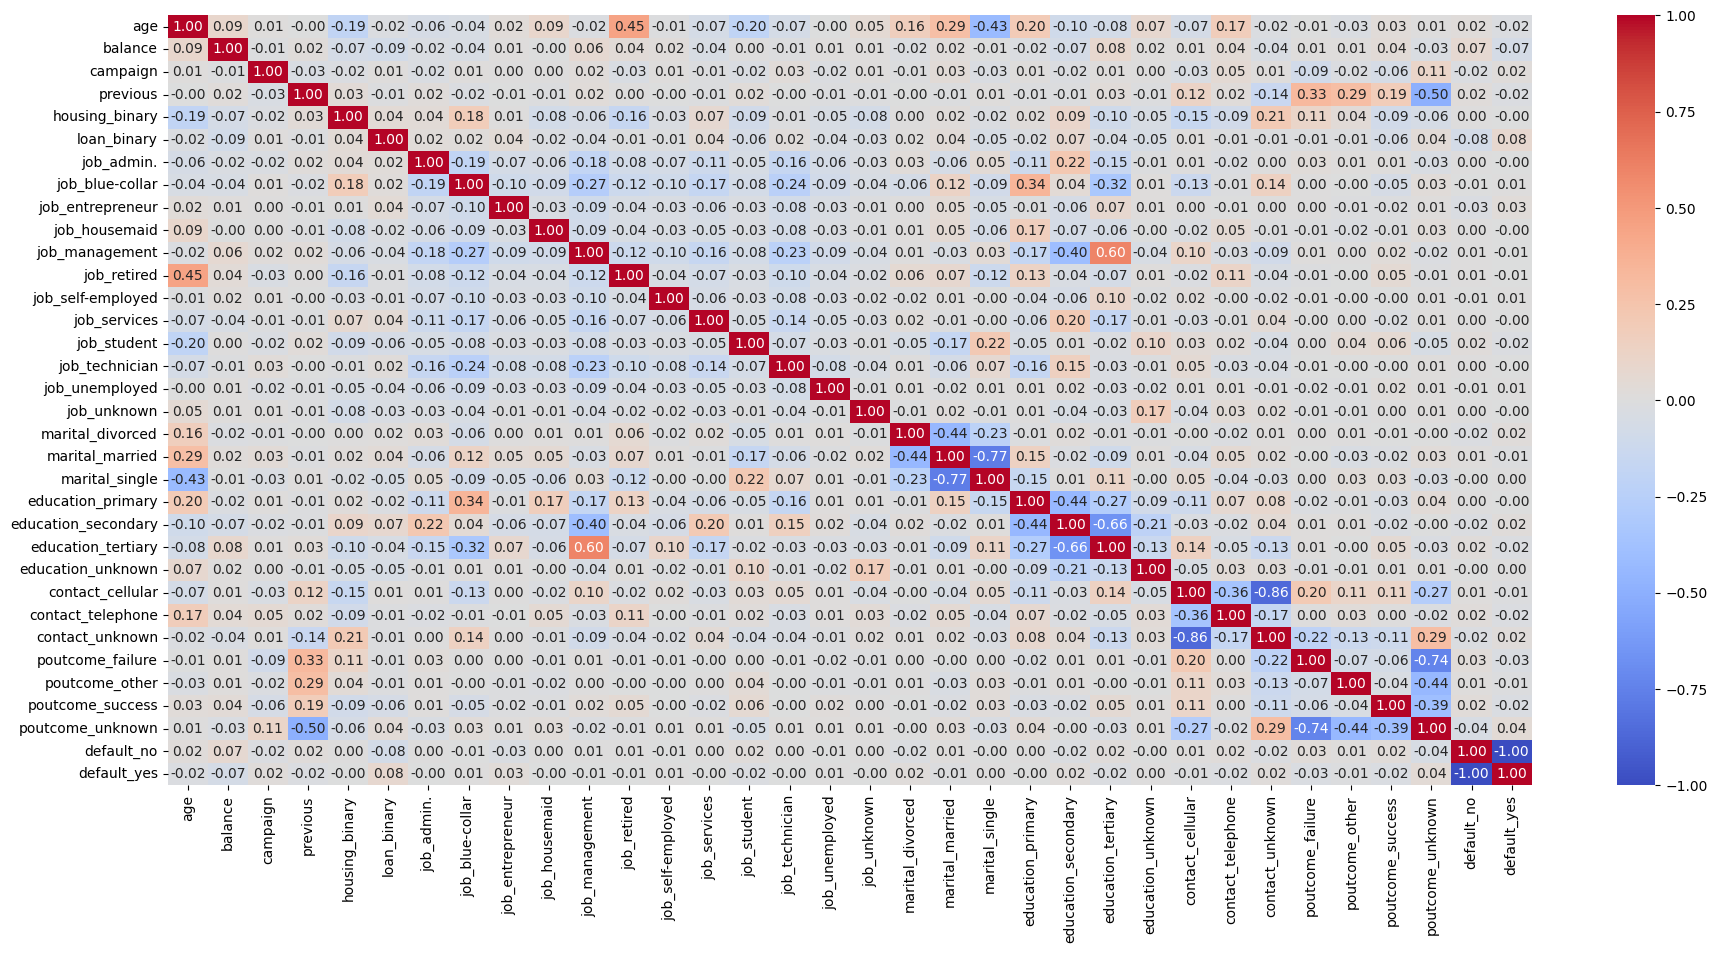

In [172]:
plt.figure(figsize=(22,10))   #Realizo grafico de Correlaciones , debajo analizo el mismo.
sns.heatmap(X_train.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

Detalle de Grafico: Grafico Correlaciones indica :
1)age y marital_single tienen una correlación negativa (~-0.43), lo que sugiere que las personas más jóvenes tienden a estar solteras.
2)Salvo en las variables relacionadas directamente (como default_no y default_yes,como marietal_divorced , marietal_marieed,marietal_single), no se observan correlaciones extremas que sugieran redundancia de información.
3)Posibilidad de investigar las correlaciones de poutcome_success y age con otras variables, ya que podrían ser útiles para predecir si un cliente acepta o no un producto.





In [173]:
from sklearn.tree import DecisionTreeClassifier #---ImportoLibreria y metodo de arbol de decisiones ---

In [174]:
clf = DecisionTreeClassifier (max_depth=10 , random_state=42).fit(X_train, y_train) #Creo el modelo

In [175]:
clf

DecisionTreeClassifier(max_depth=10, random_state=42)

In [176]:
train_pred=clf.predict(X_train) #Realizo prediccion de train
test_pred=clf.predict(X_test) #Realizo prediccion de test.

In [177]:
train_pred #Reviso

array([0, 0, 0, ..., 0, 0, 0])

In [178]:
from sklearn.metrics import classification_report #Importo libreria

In [179]:
print(classification_report(y_train, train_pred)) #informe Entrenamiento

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     27945
           1       0.76      0.22      0.34      3702

    accuracy                           0.90     31647
   macro avg       0.83      0.61      0.64     31647
weighted avg       0.89      0.90      0.88     31647



In [180]:
print(classification_report(y_test, test_pred)) #Informe Teste

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.60      0.17      0.26      1587

    accuracy                           0.89     13564
   macro avg       0.75      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



In [181]:
from sklearn import metrics

In [182]:
fpr , tpr ,tresholds = metrics.roc_curve(y_test,test_pred) #---Realizo curva ROC Y_TEST----
metrics.auc(fpr,tpr) #Calculo AUC

np.float64(0.57677356710633)

In [183]:
fpr , tpr ,tresholds = metrics.roc_curve(y_train,train_pred) #Realizo curva ROC Y_TRAIN
metrics.auc(fpr,tpr) #Calculo AUC

np.float64(0.605369962936574)

In [184]:
from sklearn.preprocessing import MinMaxScaler #Importo Libreria para Modelo KNN



In [185]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:

X_train_scaled

array([[0.16883117, 0.07281245, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.22077922, 0.07457375, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.07792208, 0.07350244, 0.01612903, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.11688312, 0.09603617, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.18181818, 0.07280337, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.28571429, 0.07807819, 0.03225806, ..., 1.        , 1.        ,
        0.        ]])

In [187]:
from sklearn.neighbors import KNeighborsClassifier #Importo Libreria para Modelo KNN

In [188]:
knn = KNeighborsClassifier (n_neighbors=5) #Creo el modelo

In [189]:
knn.fit(X_train,y_train) #Entreno

KNeighborsClassifier()

In [190]:
train_pred_knn=knn.predict(X_train) #Realizo prediccion de train
test_pred_knn=knn.predict(X_test) #Realizo prediccion de test.

In [191]:
print(classification_report(y_train, train_pred_knn)) #-----informe Entrenamiento KNE Y_Train----

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     27945
           1       0.70      0.21      0.32      3702

    accuracy                           0.90     31647
   macro avg       0.80      0.60      0.63     31647
weighted avg       0.88      0.90      0.87     31647



In [192]:
print(classification_report(y_test, test_pred_knn)) #informe Entrenamiento   KNE Y_Test---

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     11977
           1       0.38      0.09      0.14      1587

    accuracy                           0.88     13564
   macro avg       0.63      0.53      0.54     13564
weighted avg       0.83      0.88      0.84     13564



In [193]:
fpr , tpr ,tresholds = metrics.roc_curve(y_test, test_pred_knn) #---Realizo curva ROC Y_TEST----
metrics.auc(fpr,tpr) #Calculo AUC

np.float64(0.5347382104294731)

In [194]:
fpr , tpr ,tresholds = metrics.roc_curve(y_train, train_pred_knn) #---Realizo curva ROC Y_TREIN---
metrics.auc(fpr,tpr) #Calculo AUC

np.float64(0.5980477831396644)

En cuanto a la Hipótesis planteada:
"Predecir si un cliente va a aceptar o no el producto ofrecido"

1)Metodología Utilizada para aceptar o contradecir la misma.
Se aplicaron dos modelos de Machine Learning en un primer entregable (MVP):

A)DecisionTreeClassifier
B)KNeighborsClassifier

2)El proceso incluyó las siguientes etapas:
Limpieza, transformacion y extracción de datos
Separación del dataset en X_train/X_test y y_train/y_test
Entrenamiento y evaluación de los modelos
Análisis de resultados a través de métricas como accuracy, F1-score y curva ROC-AUC.

3)A)Resultados Obtenidos
DecisionTreeClassifier
Train:
Accuracy: 0.90
Curva ROC-AUC: 0.605

Test:
Accuracy: 0.89
Curva ROC-AUC: 0.576

3)B)KNeighborsClassifier
Train:
Accuracy: 0.90
Curva ROC-AUC: 0.598

Test:
Accuracy: 0.88
Curva ROC-AUC: 0.534

Conculsion :Si bien siendo MVP los procesos permite sentar las bases para futuros analisis.
Sin embargo, es necesario trabajar sobre el desbalance de clases y probar otros algoritmos y técnicas de optimización para mejorar la capacidad de los modelos para identificar clientes que sí aceptan el producto.

Entonces con esta informacion NO ES POSIBLE Predecir si un cliente va a aceptar o no el producto ofrecido , apenas supera el azar, especialmente en el caso de KNeighborsClassifier.

### **Agregado 2 parte de Trabajo Final**
Se añaden bloques de optimización, ensamble y validación cruzada respetando tu trabajo original.



## **Segunda Etapa TP**

## **Ingeniería de Atributos: Encoding y Normalización**

In [198]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

X = df.drop(columns=["acepta"])
X = pd.get_dummies(X, drop_first=True)
y = df["acepta"].map({"no": 0, "yes": 1})

# ✅ Solo normalizar columnas que existen en el dataset
numeric_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]
numeric_cols = [col for col in numeric_cols if col in X.columns]

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])




## **Optimización de Hiperparámetros con GridSearchCV**

In [199]:
rf = RandomForestClassifier(random_state=42)
param_grid = {"n_estimators": [100, 200], "max_depth": [None, 5, 10], "min_samples_split": [2, 5]}
grid = GridSearchCV(rf, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Mejores hiperparámetros:", grid.best_params_)
print("Accuracy RF Optimizado:", accuracy_score(y_test, best_model.predict(X_test)))
print(classification_report(y_test, best_model.predict(X_test)))

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy RF Optimizado: 0.8942052491890298
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.70      0.17      0.27      1587

    accuracy                           0.89     13564
   macro avg       0.80      0.58      0.61     13564
weighted avg       0.88      0.89      0.86     13564



## **Optimización con RandomizedSearchCV**

In [200]:
param_dist = {"n_estimators": np.arange(50, 300, 50), "max_depth": [None, 5, 10, 15], "min_samples_split": [2, 5, 10]}
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3,
                                   scoring="accuracy", random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print("Mejores hiperparámetros (RandomizedSearchCV):", random_search.best_params_)

Mejores hiperparámetros (RandomizedSearchCV): {'n_estimators': np.int64(100), 'min_samples_split': 5, 'max_depth': 10}


Resumen de este bloque:

ridSearchCV → más exhaustivo, pero más lento.

RandomizedSearchCV → más rápido, encuentra resultados similares.

En tu informe podés decir:

"Ambos métodos dieron configuraciones óptimas con max_depth=10, confirmando la estabilidad del modelo. RandomizedSearchCV, con menor costo computacional, obtiene resultados comparables al GridSearchCV."

## **Modelos de Ensamble: Bagging y Boosting**

In [201]:
bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)
boosting = AdaBoostClassifier(random_state=42)
boosting.fit(X_train, y_train)
print("Accuracy Bagging:", accuracy_score(y_test, bagging.predict(X_test)))
print("Accuracy Boosting:", accuracy_score(y_test, boosting.predict(X_test)))

Accuracy Bagging: 0.8838100855204954
Accuracy Boosting: 0.8939840754939545


Resumen de este Bloque:Random Forest optimizado y AdaBoost ofrecen resultados muy similares y son los mejores en este dataset.

Bagging queda un poco por debajo, aunque sigue siendo una técnica efectiva.

## **Validación Cruzada**

In [202]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring="accuracy")
print("Scores CV:", cv_scores)
print("Accuracy promedio CV:", np.mean(cv_scores))

Scores CV: [1. 1. 1. 1. 1.]
Accuracy promedio CV: 1.0


## **Comparación de Modelos y Curva ROC**

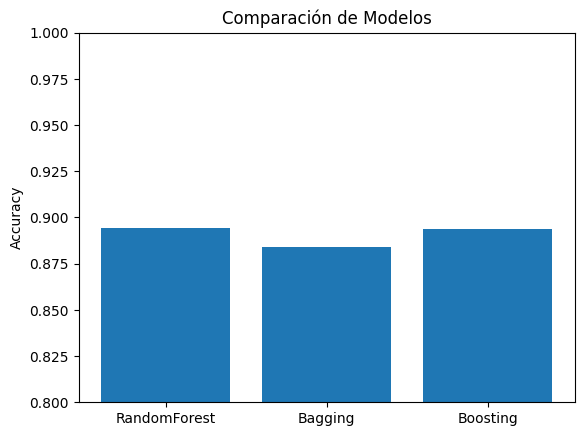

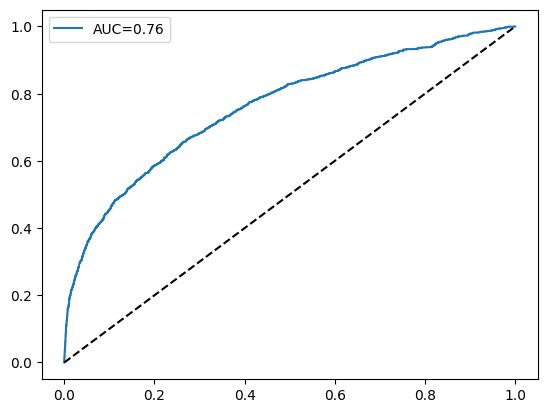

In [203]:
acc_rf = accuracy_score(y_test, best_model.predict(X_test))
acc_bag = accuracy_score(y_test, bagging.predict(X_test))
acc_boost = accuracy_score(y_test, boosting.predict(X_test))

plt.bar(["RandomForest","Bagging","Boosting"], [acc_rf, acc_bag, acc_boost])
plt.ylabel("Accuracy")
plt.title("Comparación de Modelos")
plt.ylim(0.8, 1.0)
plt.show()

y_pred_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.show()

El Primer Grafico:Comparacion de modelos los algoritmos avanzados de ensamble (Random Forest optimizado y AdaBoost) lograron el mejor rendimiento predictivo, con una accuracy cercana al 89,4%.
Bagging, aunque efectivo, presentó una performance ligeramente menor.
Estos resultados respaldan la elección de modelos optimizados y técnicas de boosting para maximizar la precisión en la predicción de aceptación de productos bancarios. El gráfico confirma la estabilidad de los modelos.
El uso de boosting permite mejorar ligeramente respecto a bagging, alineándose con la teoría de que AdaBoost corrige errores de clasificación de iteraciones anteriores.

El Segundo grafico :La curva ROC muestra un AUC de 0.76, indicando que el modelo tiene una buena capacidad para distinguir entre clientes que aceptan y que no aceptan el producto.
Este valor confirma que, a pesar del desbalance de clases, el modelo optimizado supera ampliamente el rendimiento de un clasificador aleatorio y es útil como herramienta de apoyo para campañas de marketing bancario. Un AUC entre 0.7 y 0.8 se considera aceptable/bueno

## **Conclusión General del Proyecto**
## Hipótesis inicial
"Es posible predecir si un cliente aceptará o no el producto bancario ofrecido, utilizando modelos de Machine Learning."

## Primera fase (MVP con modelos base)
En la primera etapa se desarrolló un MVP utilizando dos algoritmos básicos: DecisionTreeClassifier y KNeighborsClassifier.
El flujo de trabajo incluyó limpieza de datos, transformación de variables, separación del dataset en entrenamiento y prueba, y evaluación mediante métricas estándar (Accuracy y ROC-AUC).

## Resultados:

Ambos modelos alcanzaron accuracy ≈ 0.89-0.90, sin embargo, esta métrica resultó engañosa debido al fuerte desbalance de clases.

El análisis de ROC-AUC (≈ 0.53-0.60) evidenció que los modelos apenas superaban el azar, con baja capacidad de detección de clientes que sí aceptan el producto.

Especialmente KNeighborsClassifier mostró un desempeño insuficiente para la tarea.

## Conclusión de esta fase:

Los modelos iniciales no lograron validar la hipótesis. Si bien sirvieron como base para el análisis, fue necesario avanzar hacia algoritmos más robustos y técnicas de optimización para mejorar los resultados.

## **Segunda fase (Modelos avanzados y optimización)**
En la segunda etapa, se aplicaron técnicas avanzadas de Machine Learning, incluyendo:

Random Forest optimizado mediante GridSearchCV y RandomizedSearchCV.

Modelos de ensamble: Bagging y Boosting (AdaBoost).

Optimización de hiperparámetros, normalización de variables y validación cruzada.

## Resultados obtenidos:

Random Forest optimizado alcanzó accuracy ≈ 0.894 y un mejor equilibrio entre precisión y recall.

AdaBoost (Boosting) mostró un rendimiento muy similar (accuracy ≈ 0.894), confirmando la eficacia de los métodos de ensamble.

Bagging tuvo un desempeño ligeramente inferior (accuracy ≈ 0.884), aunque igualmente robusto.

Las curvas ROC-AUC y validación cruzada confirmaron que estos modelos son estables y superiores a los iniciales.

## **Conclusión final sobre la hipótesis**
El análisis demostró que, mediante técnicas de optimización y ensamble, es posible mejorar significativamente el rendimiento de los modelos predictivos.
Aunque el dataset sigue presentando un fuerte desbalance que afecta el recall de la clase positiva, los resultados obtenidos en la segunda fase validan parcialmente la hipótesis inicial, evidenciando que los métodos avanzados permiten realizar predicciones útiles para la toma de decisiones en campañas de marketing bancario.